# Advertising Project

## Choosing the best market

A company must always look for ways to promote its products and services. One way to do this is by investing in advertising. By doing this, the company aims to reach a wider audience and increase awareness of our company and its offerings. This project analyzes an e-learning company that wants to promote one of its products by investing in advertising. We will thoroughly analyze the e-learning market and develop a targeted advertising campaign to achieve this goal.

The company provided data from a survey where users of its platform informed personal data, goals, and availability to purchase products. The task is to define the best markets to invest in advertising.

First, let us import the data file for the analysis.

The file in question is the 2017 freeCodeCamp "New Coder Survey." It can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={'CodeEventOther':str, 
                                                                'JobInterestOther':str})

The file needed some column sorting to avoid an error.
Due to the number of columns, we will limit our dataset, focusing only on the columns of interest for the analysis.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [3]:
df2 = df[['Age','CountryLive','CityPopulation', 'EmploymentField', 'EmploymentStatus', 'ExpectedEarning', 'Gender', 'HasDebt','HasFinancialDependents', 'HasHighSpdInternet','JobRoleInterest','MoneyForLearning','MonthsProgramming','SchoolDegree','SchoolMajor']].copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     15367 non-null  float64
 1   CountryLive             15336 non-null  object 
 2   CityPopulation          15354 non-null  object 
 3   EmploymentField         8116 non-null   object 
 4   EmploymentStatus        14345 non-null  object 
 5   ExpectedEarning         7200 non-null   float64
 6   Gender                  15454 non-null  object 
 7   HasDebt                 15291 non-null  float64
 8   HasFinancialDependents  15329 non-null  float64
 9   HasHighSpdInternet      15380 non-null  float64
 10  JobRoleInterest         6992 non-null   object 
 11  MoneyForLearning        16577 non-null  float64
 12  MonthsProgramming       17084 non-null  float64
 13  SchoolDegree            15368 non-null  object 
 14  SchoolMajor             8727 non-null 

## Job interest

Next, we will check the interest in the area of work of those who answered the survey.

In [5]:
df2['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

Users can choose between one interest or several. The first interest is "Full-Stack Web Developer," which appears with 11% of the votes. However, it may get a higher percentage due to users choosing more than one interest.

The company focuses on Web and Mobile Development, so we will isolate these titles to assess the actual percentage of people interested in these areas.

In [6]:
df2['JobRoleInterest'].describe()

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

In [7]:
WD = df2['JobRoleInterest'].str.contains('Web Developer').fillna(False)
MD = df2['JobRoleInterest'].str.contains('Mobile Developer').fillna(False)

In [8]:
df2['JobRoleInterest'][WD].value_counts().sum()

5776

In [9]:
df2['JobRoleInterest'][MD].value_counts().sum()

2304

In this way, 82.6% of respondents are interested in Web Developer, while 32.9% are interested in Mobile Developer.

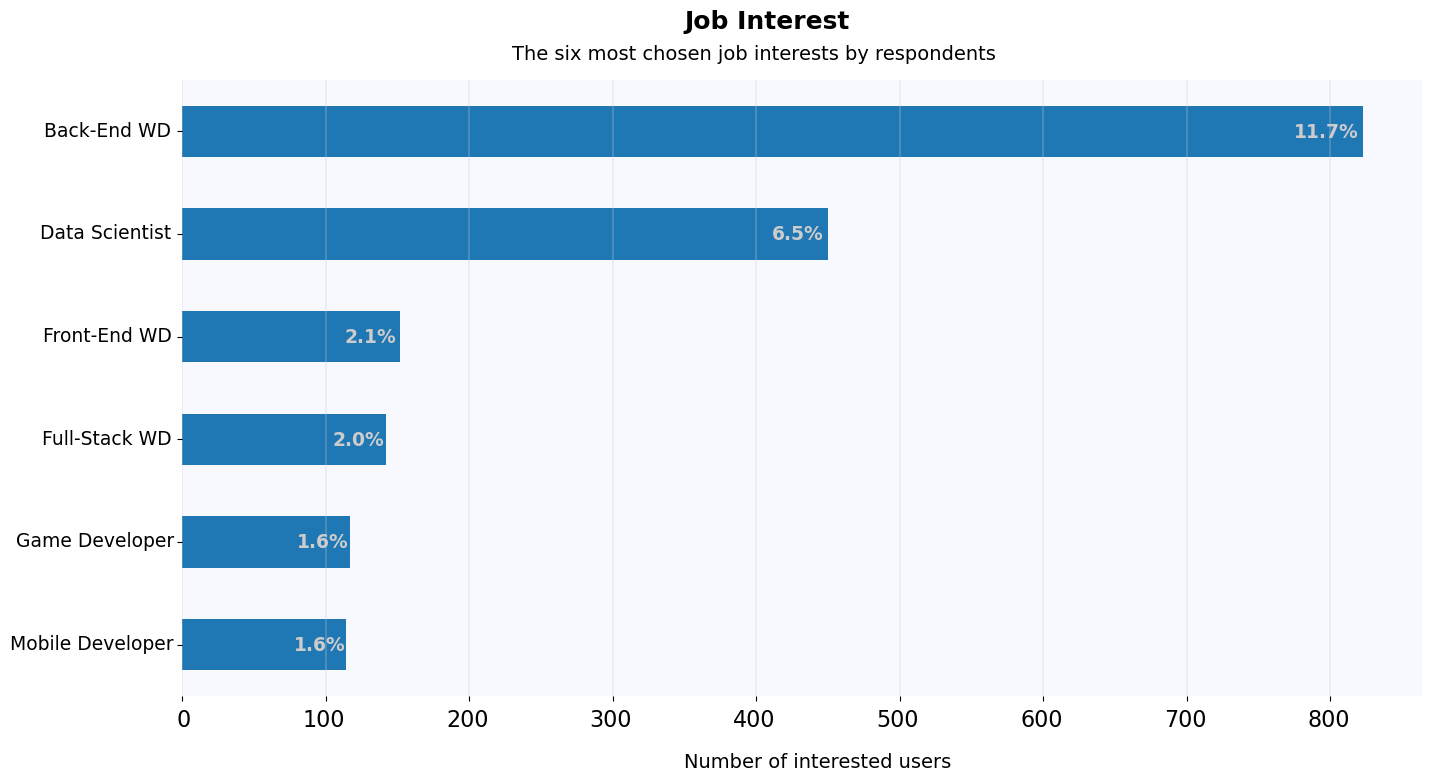

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
df2['JobRoleInterest'].value_counts(normalize=False)[:6].sort_values().plot.barh()
plt.xticks(rotation=0)
ax.set_facecolor('#F8F8FF')
ax.grid(color='#CCCCCC', linestyle='solid', lw = 1.2, axis='x',alpha=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

#Title
ax.text(x=350,y=6,s='Job Interest',size=18, weight ='bold')
ax.text(x=230,y=5.7,s='The six most chosen job interests by respondents',size=14)

#Labels X
ax.set_xticklabels([])
qtd = ['0', '100', '200', '300','400','500','600','700','800']
posx = [12,100,200,300,400,500,600,700,800,]

for i in range(9): 
    ax.text(x=posx[i]-16, y=-0.8, s=qtd[i],size=16)

ax.text(x=350,y=-1.2,s='Number of interested users',size=14)


#Labels Y
ax.set_yticklabels([])
role = ['Back-End WD','Data Scientist','Front-End WD','Full-Stack WD','Game Developer                 ', 'Mobile Developer                   ']
num = ['11.7%','6.5%','2.1%','2.0%','1.6%','1.6%']
posy = [5,4,3,2,1,0]

for i in range(6):
    ax.text(x=-85-len(role[i]), y=posy[i]-.05, s=role[i],size=13.5)

ax.text(x=78, y=posy[5]-.06, s=num[5],size=13.5, color='#CCCCCC', weight='bold')
ax.text(x=80, y=posy[4]-.06, s=num[4],size=13.5, color='#CCCCCC', weight='bold')
ax.text(x=105, y=posy[3]-.06, s=num[3],size=13.5, color='#CCCCCC', weight='bold')
ax.text(x=113, y=posy[2]-.06, s=num[2],size=13.5, color='#CCCCCC', weight='bold')
ax.text(x=411, y=posy[1]-.06, s=num[1],size=13.5, color='#CCCCCC', weight='bold')
ax.text(x=775, y=posy[0]-.06, s=num[0],size=13.5, color='#CCCCCC', weight='bold')

    
plt.show()

For the analysis to be successful, the primary source of information must be 'JobRoleInterest' so that we can know the participant's focus. This way, we will only work with the participants who provided this information.

In [11]:
# Creating a mask 
mask = df2['JobRoleInterest'].str.contains('\w', na=False)

In [12]:
df3 = df2[mask]

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6839 non-null   float64
 1   CountryLive             6838 non-null   object 
 2   CityPopulation          6839 non-null   object 
 3   EmploymentField         2733 non-null   object 
 4   EmploymentStatus        6285 non-null   object 
 5   ExpectedEarning         6196 non-null   float64
 6   Gender                  6891 non-null   object 
 7   HasDebt                 6816 non-null   float64
 8   HasFinancialDependents  6833 non-null   float64
 9   HasHighSpdInternet      6866 non-null   float64
 10  JobRoleInterest         6992 non-null   object 
 11  MoneyForLearning        6476 non-null   float64
 12  MonthsProgramming       6633 non-null   float64
 13  SchoolDegree            6844 non-null   object 
 14  SchoolMajor             3705 non-null  

## Choosing Promising Countries

As the data provides information about the country where the user lives, each country is a potential market for our advertising.
We will analyze and select the two promising countries to implement our proposal.

In [14]:
# Creating a a new df to plot a pie with "others"
dpie = pd.DataFrame(data={'Country':df3['CountryLive'].value_counts().sort_values(ascending=False).index,
                         'Value':df3['CountryLive'].value_counts().sort_values(ascending=False).values})

# Creating a copy with the top 5
dpie2 = dpie[:5].copy()

# Creating a row with the sum of others
new_row = pd.DataFrame(data={'Country':['Others'],
                         'Value':dpie['Value'][5:].sum()})

#Concat
dpie2 = pd.concat([dpie2, new_row])


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

# Pie
country = dpie2['Country']
explode = (0.05,0,0,0,0,0.02)
wedges, texts,autotexts = ax.pie(dpie2['Value'], shadow=True, explode = explode, autopct='%1.1f%%')
ax.legend(wedges, country, title="Country", loc='center right',  bbox_to_anchor=(0.8, 0.2 ,0.5, 0.5))

# % labels
plt.setp(autotexts, size=8, weight="bold")

# Title
ax.text(x=-0.65,y=1.2,s='Countries of Respondents',size=18, weight ='bold')
ax.text(x=-0.9,y=1.1,s='Countries with the largest population of respondents',size=14)

plt.savefig('pie_countries.jpg', format='jpg',dpi=1200, bbox_inches = 'tight')

plt.show()


The result shows a large US slice, becoming an obvious choice for our advertising. Although "Others" have a share of 36.3% individually, each country contributes less than 1.9%.

This way, we will refine our data containing only information from the first four countries (USA, India, UK, and Canada) because they have the highest frequency, and all are native English speakers.

In [16]:
country = ['United States of America','India', 'United Kingdom', 'Canada']
dic = {}
for c in country:
    data = df3[df3['CountryLive'] == c]
    dic[c] = data

df4 = pd.concat([dic['United States of America'],dic['United Kingdom'],
                   dic['India'],dic['Canada']],
                  ignore_index=True)

## Spending Money for Learning

We need to know how much each user is willing to spend learning the courses. 
For this, we will use the columns 'MonthsProgramming' and 'MoneyForLearning' to calculate how much is spent in each of these countries on average.
The value of 'MonthsProgramming' equal to zero was changed to one to avoid numerical errors.

In [17]:
df4['MonthsProgramming'] = df4['MonthsProgramming'].replace(0.0,1)
df4['MPM'] = df4['MoneyForLearning']/df4['MonthsProgramming']

In [18]:
df4['MPM'].notna().value_counts()

True     3915
False     313
Name: MPM, dtype: int64

In [19]:
df4 = df4[df4['MPM'].notna()]
df4 = df4.reset_index(drop=True)

In [20]:
df4.groupby('CountryLive')['MPM'].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MPM, dtype: float64

## Extreme Outliers

To check whether the values obtained are consistent, we will analyze whether there are outliers that influence positively or negatively.

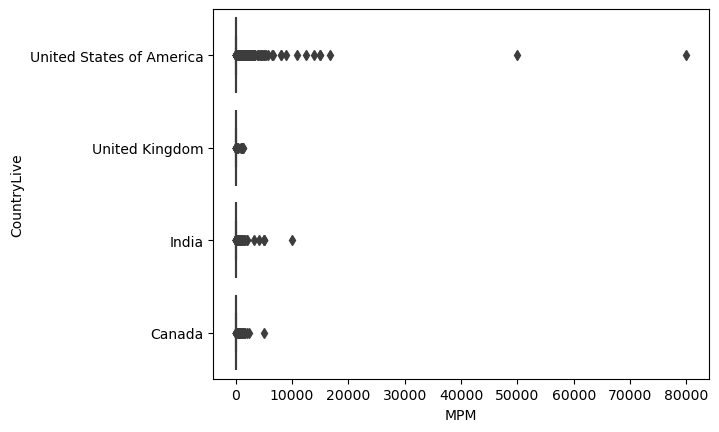

In [21]:
sns.boxplot(data=df4, x = 'MPM', y = 'CountryLive')
plt.show()

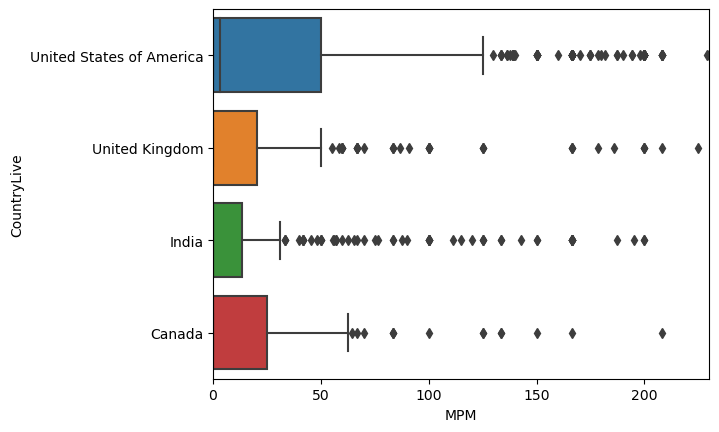

In [22]:
sns.boxplot(data=df4, x = 'MPM', y = 'CountryLive')
plt.xlim(0,230)
plt.show()

The data has many outliers. If we use the rule of upper quartile minus lower quartile times 1.5 to consider an outlier, we will have a big problem. Using common sense, a user can spend more than 200 dollars per month depending on the number of courses he has purchased. Extrapolating this scenario, let us consider a maximum monthly expense of 1000 dollars for each country.

In [23]:
outliers = df4[df4['MPM']>1000]

In [24]:
df4 = df4.drop(outliers.index)

In [25]:
df4.groupby('CountryLive')['MPM'].mean().sort_values(ascending=False)

CountryLive
United States of America    59.390462
India                       47.865239
Canada                      46.934471
United Kingdom              32.080107
Name: MPM, dtype: float64

One thing is clear, investing in the US is for sure.

Using the last parameter, the choice for the second market would be India. In addition to having a high monthly expense, we are talking about a population approximately 30x larger than Canada's; advertising will potentially reach more people.